# Introduction to Computer Vision for Robotics

In this tutorial you will be introduced to some basic concepts of computer vision and programming and have the chance to practice yourself.

### Jupyter Notebooks

As you've found out by now, this tutorial is run using a jupyter notebook. This is an online programming environment which has been set up to take you through the tasks for this tutorial. Things to note with jupyter notebooks:
 - There are two types of 'cells', text cells like this one and code cells shown by the [?]: symbol at the side which contain the code that you'll run. As you go through feeel free to edit code cells and see what happens when you change them.
 - To run a cell press shift-enter or click the run button at the top of the page.
 - Sometimes you can accidentally enter editing mode of the text cells, if that happens just run the cell (shift-enter) to exit editing mode.
 - Some cells refer to variables created in other cells so make sure to run all cells in order
 
This notebook is set up to run with the Python programming language. Different languages are structured and written differently which makes them good for different tasks, Python is a powerful language that's used a lot in research and is also relatively easy to start using.

### Tutorial Structure

This tutorial will give you a quick introduction to some core programming concepts and also some computer vision tasks. The first part will give and introduction to basic programming concepts, if you've done some programming before feel free to go over these quickly. The sections to this tutorial are:
 - Basic Programming Concepts
 - What are digital images?
 - Filtering an image
 - Edge detection



## Basic Programming Concepts

### Variables

When programming, a piece of data has a a name and a data type. In this tutorial we'll use four data types:
 - int - Used for storing an integer, i.e. a whole number
 - float - Used for storing a floatimg point number, i.e. with decimal point
 - str - Used for storing a String, i.e. sequence of characters
 - list - Stores a comma separated list of data
 - array - Stores an array of data, we'll be using a library called 'numpy' which is useful for performing operations arrays. A library is some code written to perform specific operations, in this case the numpy library has useful inbuilt operation for dealing with large data arrays.
 
In code you'll see two types of text, the actual code and comments. Comments are used to explain what's goin on in the code but aren't run by the program, in Python a comment is made by starting with the # symbol and are shown as italicised text. If you're not sure what some part of the code is doing try reading the comments for an explanation.

The print statement is used to display a variable or message to the user. The structure is print( *variable name* ) or print( "*message*" ).

The type() function isused to retrieve the type of a variable, e.g. type(*variable*)

Try running the code cell below and make sure you understand where all the oupt statements are coming from.

In [1]:
%matplotlib inline
import numpy as np # Import the numpy library, name it np
import cv2
from matplotlib import pyplot as plt

print("Hello, World!") # print a message

a = int() # Create blank int variable
print(a) # print variable a
print(type(a)) # print type of variable a

a = 9 # Set value of a to 9
b = 9.3 # Create a float
c = a + b # basic arithmitic
d = "Hello, World!" # Create a string
e = ["A list", 6, 9.4, ["A list", "In a list"]] # A list
f = np.array((4, 5)) # Create an array with 4 rows and 5 columns
g = np.array([[1, 2, 3],[4, 5, 6]]) # Create an array with 
h = np.zeros((2, 3)) # Create an array of zeros
i = np.ones((1, 6)) # Create an array of ones

print(a, type(a)) # We can print more than one thing in a single line by separating the variables with a comma
print(b, type(b))
print(c, type(c))
print(d, type(d))
print(e, type(e))
print(f, type(f), f.shape)
print(g, type(g))
print(h, type(h))
print(i, type(i))

Hello, World!
0
<class 'int'>
9 <class 'int'>
9.3 <class 'float'>
18.3 <class 'float'>
Hello, World! <class 'str'>
['A list', 6, 9.4, ['A list', 'In a list']] <class 'list'>
[4 5] <class 'numpy.ndarray'> (2,)
[[1 2 3]
 [4 5 6]] <class 'numpy.ndarray'>
[[0. 0. 0.]
 [0. 0. 0.]] <class 'numpy.ndarray'>
[[1. 1. 1. 1. 1. 1.]] <class 'numpy.ndarray'>


In Python we can select specific values in an array using square brackets []. The index of an array starts at 0, so the first element in a 1D array would be *array*[0]. 2D arrays are referenced with two indices, the first for the row number and the second for the column number, so to find the element in the 1st row and 3rd column we'd use *array*[0, 2]. To select an entire row or column we can use a colon, for example *array*[:, 1] would select all rows and the second column. This can also be extended to select a range of values (called a slice), for example *array*[0:3, 1:2]. Finally, elements can be referenced from the end of an array dimension by using negative indices, for example the last element in the first row could be found using *array*[0, -1].

This is best seen in practice, try changing values below to see what happens for different values. What happens if you try to use an index to large for the array?

In [221]:
A = np.array([[1, 2, 3],[4, 5, 6]])
print(A)
print(A[0, 2])
print(A[:, 1])
print(A[1, 0:2])
print(A[0, -1])

[[1 2 3]
 [4 5 6]]
3
[2 5]
[4 5]
3


### Code Structure: if, for, while

Code can be thought of as a flowchart with one instruction being executed at a time. In order to make decision we commonly use 'if' statements and to repeat sections of code we use 'while' loops or 'for' loops.

If statements are used with conditional operators to decide of a block of code should be executed. The operators must always be either true or false:
 - Equals: a == b
 - Not Equal: a != b
 - Less than: a < b
 - Less than or equal to: a <= b
 - Greater than: a > b
 - Greater than or equal to: a >= b

If statements can be followed by multiple 'elif' statements (short for else if) to which are evaluated of the previous statements are false. 'else' statements are used to execute code if none of the previous if or elif statements have been executed.

Run the example below and make sure you're happy with where the ouputs are coming from and why.

In [2]:
a = 5
b = 9

if a == 5:
    print("a equals five")

if a >= 5:
    print("a is greater than or equal to 5")
    
if a < 5:
    print("a is less than 5")
elif b >= a:
    print("b is greater than or equal to a")

if b < a:
    print("b is less than a")
elif b == a:
    print("b equals a")
else:
    print("b is greater than a")

a equals five
a is greater than or equal to 5
b is greater than or equal to a
b is greater than a


Loops are used to repeat sections of code, as we'll see they're important for image processing. 

'For' loops repeat the section of code a set number of times. This is often used with the 'range' function to define the range of values to iterate over, note range(0, 5) iterates over the values 0 to 4 not 0 to 5. For loops can also be used to iterate over the items in a list.

'while' loops are used to repeat a section of code until a condition is met. The conditional statements that can be used are the same as for the 'if' statement.

In [3]:
for a in range(0, 10): # for values in the range 0 - 10 (not including 10) set a to the current value and print out a
    print(a)
    
B = ["Hello", "World", 2, 6.8, ["Another", "List"]] # Create a list called B with different types of data in it
for b in B: # Loop through list B, set the value of b to the current item and print out b
    print(b)
    
b = 0
while b < 10: # Keep looping through if b is less than 10 (this would loop forever if we removed the 'b = b + 1' line)
    print(b)
    b = b + 1

0
1
2
3
4
5
6
7
8
9
Hello
World
2
6.8
['Another', 'List']
0
1
2
3
4
5
6
7
8
9


## Loading and viewing images

We'll be using an image handling library called opencv to manage our images. Let's get going by loading and viewing an image

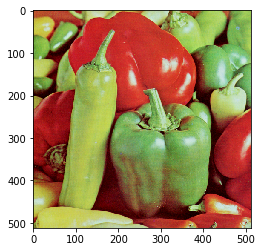

In [50]:
colour_im = cv2.imread("peppers.png") # Load the image saved as 'peppers.png' into the variable called colour_im
colour_im = cv2.cvtColor(colour_im, cv2.COLOR_BGR2RGB) # The image was saved in Blue-Green-Red format, convert it to Red-Blue-Green format
plt.imshow(colour_im) # Draw the image
plt.show() # Show the image

As we saw in the last lecture, computer images are just arrays of data. Run the code below and see how the colour image is saved as an array with 512x512 pixels and 3 channels for red, green and blue.

The code then converts the image to greyscale, see how the array changes shape to only have one channel.

(512, 512, 3)
(512, 512)
228 0


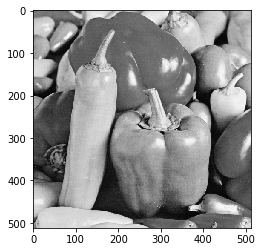

In [220]:
BW_im = cv2.cvtColor(colour_im, cv2.COLOR_RGB2GRAY) # convert colour image to greyscale

print(colour_im.shape) # print the size of the colour image in pixels, note it has 3 channels
print(BW_im.shape) # print the size of the greyscale image, note it only has one channel
print(np.max(BW_im), np.min(BW_im)) # find the min and max values in the greyscale image, should be between 0 and 255

plt.imshow(BW_im, cmap='gray') # Draw and show the image
plt.show()

We can now select specific regions of an  image easily:

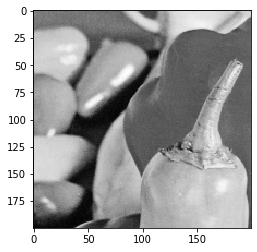

In [53]:
plt.imshow(BW_im[0:200, 0:200], cmap='gray') # Draw and show the first 200 rows and columns of pixels
plt.show()

## Filtering

Now we can use this to do useful things to images. We're going to start with a method of filtering images to help remove noise. Salt and pepper noise is where an image has random pixels that are set to black or white, the image below shows an example.

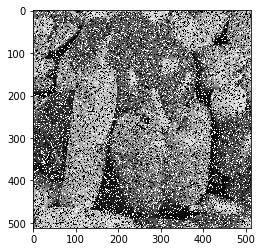

In [242]:
BW_noise = cv2.imread("peppers_BW_noise.png", 0) # Load image with noise, set it to variable 'BW_noise'
plt.imshow(BW_noise, cmap='gray') # Draw and show the image
plt.show()

One way of dealing with salt and pepper noise is to apply a median filter. In a median filter a small window (known as a kernel) is moved over an image with the centre pixel set to the median of the values in the window. This assumes that most values in an image are similar to those close to it so using the median should remove the 'pulses' of black or white.

In code we'll use two for loops to move our kernel over the image. The first for loop will move the kernel down the rows one at a time and the second will move the kernel across the rows one at a time. At each point we'll set the centre pixel to the median of all the pixels in the window. 

The code below implements this with a 3x3 kernel, run the code and read over it to check you understand what is happening, you should see the noise from the image is removed so it looks like the original grayscale image. The code might take a few seconds to run.

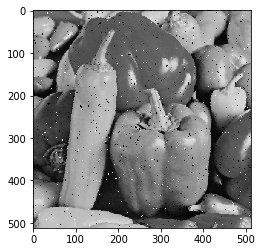

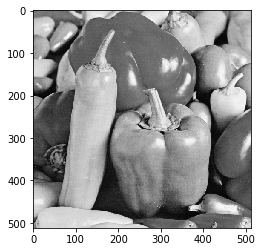

In [247]:
kernel_size = 3 # Set size of kernel

pix_range = int(kernel_size/2) 
filter_im = np.zeros((BW_noise.shape[0], BW_noise.shape[1])) # create array of zeros with same shape as input image

for y in range(0+pix_range, BW_noise.shape[0]-pix_range): # Loop through all viable rows for given kernel size
    for x in range(0+pix_range, BW_noise.shape[1]-pix_range): # Loop through all viable columns for given kernel size
        window = BW_noise[y-pix_range:y+pix_range+1, x-pix_range:x+pix_range+1] # select window with size of kernel centred around current pixel from noisy image  
        filter_im[y, x] = np.median(window) # Set current pixel in filtered image to median of window

plt.imshow(filter_im, cmap='gray') # Draw and show the filtered image
plt.show()
plt.imshow(BW_im, cmap='gray') # Draw and show the original image without noise for comparison
plt.show()

You may have found that the code took a few seconds to run as iterating over every pixel takes a while with the for loops. Luckily the opencv library has a median filter built in which much more efficient and only needs one line of code for us to run. You should find the code below runs faster than the one we had before.

Try changing the kernel size, as it gets larger you should see more noise is removed but the image also starts to become blurry.

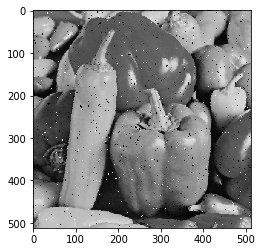

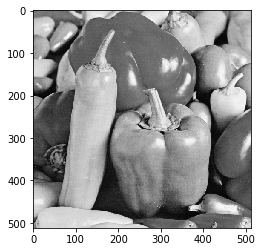

In [248]:
kernel_size = 3
filter_im = np.zeros((BW_noise.shape[0], BW_noise.shape[1]))

filter_im = cv2.medianBlur(BW_noise, kernel_size)

plt.imshow(filter_im, cmap='gray')
plt.show()
plt.imshow(BW_im, cmap='gray')
plt.show()

## Edge Detection

One of the key uses of computer vision in robotics is to try and find objects in images. To do this it's important to find edges in images where sudden changes in intensity show where an object might start or end.

We saw the Prewitt edge detector in the lecture, let's see it in action. To start we have a simple image of a grid, see how the x kernel detects horizontal lines and the y kernel detects veretical lines.

In the code below, the 'cv2.filter2D' function performs the same action we saw before of running teh kernel over every pixel in the image. Using this function runs faster and shorter to write than using multiple 'for' loops every time.

Using the kernel below, an edge going from black (0) to white (255) will give a value of -765, whereas an edge going from white to black 765 and an area of uniform colour will be 0. When the image is displayed this range is scaled to the range 0-255 so white to black edges show up as white(255), black to white edges show up as black(0) and uniform areas are grey(128).

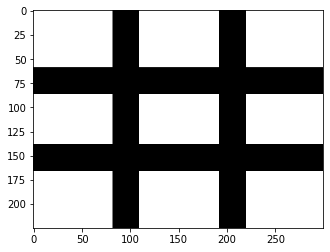

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


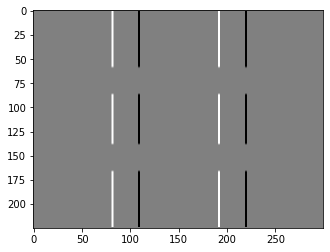

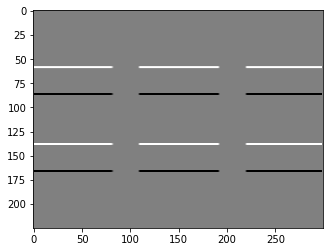

In [400]:
grid_im = cv2.imread("grid.png", 0) # Read the image from file

plt.imshow(grid_im, cmap='gray') # Draw and show the image
plt.show()

# Create the x and y kernels
kernelx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
kernely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print(kernelx)
print(kernely)

pix_range = int(kernelx.shape[0]/2) 
sobel_x = np.zeros((grid_im.shape[0], grid_im.shape[1])) # create array of zeros with same shape as input image
sobel_y = np.zeros((grid_im.shape[0], grid_im.shape[1])) # create array of zeros with same shape as input image

for y in range(0+pix_range, grid_im.shape[0]-pix_range): # Loop through all viable rows for given kernel size
    for x in range(0+pix_range, grid_im.shape[1]-pix_range): # Loop through all viable columns for given kernel size
        window = grid_im[y-pix_range:y+pix_range+1, x-pix_range:x+pix_range+1] # select window with size of kernel centred around current pixel from noisy image  
        sobel_x[y, x] = np.sum(kernelx * window) # Multiply window by x kernel and sum all elements
        sobel_y[y, x] = np.sum(kernely * window) # Multiply window by y kernel and sum all elements

plt.imshow(sobel_x, cmap='gray') # Draw and show the original image without noise for comparison
plt.show()
plt.imshow(sobel_y, cmap='gray') # Draw and show the original image without noise for comparison
plt.show()

As with the median filter, the opencv library has already got a sobel filtering function (cv2.Sobel(...)) implemented that is shorter to write and runs faster than the code above. 

If we don't care about the direction of a gradient we take the magnitude tp combine the two x and y gradients:

\begin{equation}
magnitude = \sqrt{x^{2} + y^{2}}
\end{equation}

It's also good practice to rescale the image range from 0-765 back to 0-255 so we can use standard manipulations. The code below implements all these changes, you can see it's much neater than the code above with the for loops.


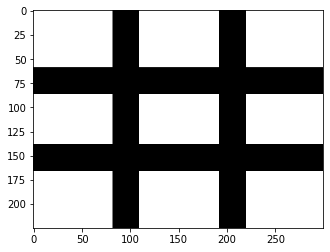

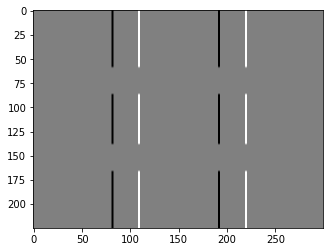

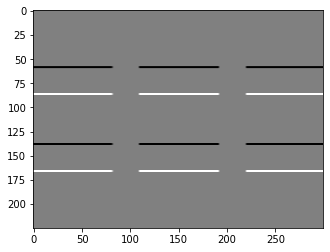

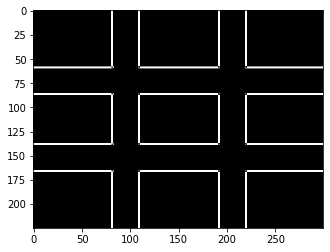

In [401]:
grid_im = cv2.imread("grid.png", 0) # Read the image from file

plt.imshow(grid_im, cmap='gray') # Draw and show the image
plt.show()

# Apply x and y sobel filters
img_sobelx = cv2.Sobel(grid_im, cv2.CV_64F, 1, 0, ksize = 3)
img_sobely = cv2.Sobel(grid_im, cv2.CV_64F, 0, 1, ksize = 3)

mag = np.sqrt(np.square(img_sobelx) + np.square(img_sobely)) # Find magnitude of x and y components
img_sobel = np.uint8(mag) # convert gradient scale to an 8bit integer (range 0-255)

plt.imshow(img_sobelx, cmap='gray')
plt.show()
plt.imshow(img_sobely, cmap='gray')
plt.show()
plt.imshow(img_sobel, cmap='gray')
plt.show()

We'll now take the functions we've used so far and apply them to a more realistic scenario. One use of edge detection in robotics is for navigation, either on a mobile robot or a driverless car. By following lines marked on the ground a robot can navigate around a builing or roads. For this example we'll take an example from a line following robot where we need to locate the lines within the image. After the lines have been located the robot would then perform some more processing to work out which direction they point and which way to drive.

<img src="robot_line_raw.jpeg" width="240" height="240" align="center"/>

Image taken from this article, worth reading for more information on a real scenario: https://becominghuman.ai/autonomous-racing-robot-with-an-arduino-a-raspberry-pi-and-a-pi-camera-3e72819e1e63

Read through and run the code below, check you understand what's happening at each step. Try changing the parameters at the top and see how the result changes. 

The overall sequence can be summarised as:
 - Filter image to reduce noise
 - Apply sobel filter to detect edges
 - Threshold the edges - This will remove edges that are less intense than the threshold value
 - Apply Hough transform to find long straight lines in image* 
 
 
*We haven't convered this step in detail, feel free to research this further if you would like. The basic principle is to find all the lines in the thresholded image that meet certain requirements on length, straightness, etc. If you'd like to read more try this link: https://medium.com/@tomasz.kacmajor/hough-lines-transform-explained-645feda072ab


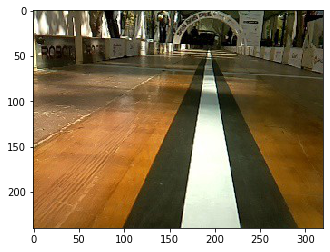

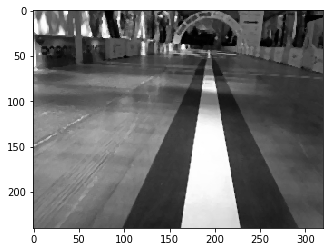

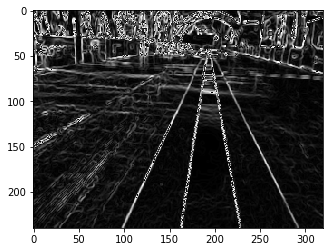

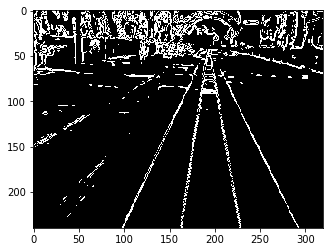

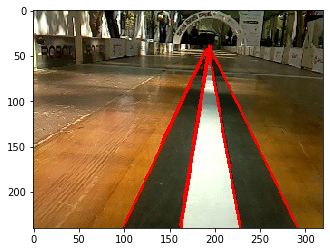

In [410]:
# Parameters to try changing:
median_filter_size = 3 # Set median kernel size
threshold = 100 # Set edge intensity threshold
sobel_k_size = 3

# Load image from  file, convert colour type and display
road_im_original = cv2.imread("robot_line_raw.jpeg")
road_im_original = cv2.cvtColor(road_im_original, cv2.COLOR_BGR2RGB)
plt.imshow(road_im_original)
plt.show()

# convert colour image to greyscale and apply median filter
road_BW = cv2.cvtColor(road_im, cv2.COLOR_RGB2GRAY) 
road_im = cv2.medianBlur(road_im_original, median_filter_size)
plt.imshow(road_BW, cmap='gray')
plt.show()

# Apply sobel filter
img_sobelx = cv2.Sobel(road_BW, cv2.CV_64F, 1, 0, ksize = sobel_k_size)
img_sobely = cv2.Sobel(road_BW, cv2.CV_64F, 0, 1, ksize = sobel_k_size)
mag = np.sqrt(np.square(img_sobelx) + np.square(img_sobely))
img_sobel = np.uint8(mag)
plt.imshow(img_sobel, cmap='gray')
plt.show()

# Apply threshold to edge detection image, any edges with intensity greater than the threshold value are set to 255 (white) and those not are set to 0 (black)
_, threshold_im = cv2.threshold(img_sobel.astype(float), threshold, 255, cv2.THRESH_BINARY)
plt.imshow(threshold_im, cmap='gray')
plt.show()

# Use Hough transform to find straight lines in threshold image
lines = cv2.HoughLinesP(threshold_im.astype(np.uint8), 1, np.pi/180, 135, minLineLength=100, maxLineGap=10)

# Draw red lines on the original image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(road_im_original, (x1, y1), (x2, y2), (255, 0, 0), 2)

#Show resultant image
plt.imshow(road_im_original, cmap='gray')
plt.show()

## Conclusion

That's it for this coding exercise. If you'd like to know more about image processing there are lots of useful introductions online so try implementing some functions yourself.